In [223]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/82108/Desktop/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [225]:
# 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [227]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

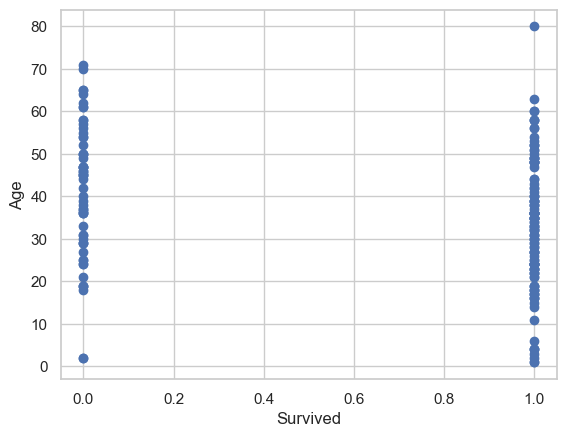

In [228]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Survived'], df['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')

plt.show()

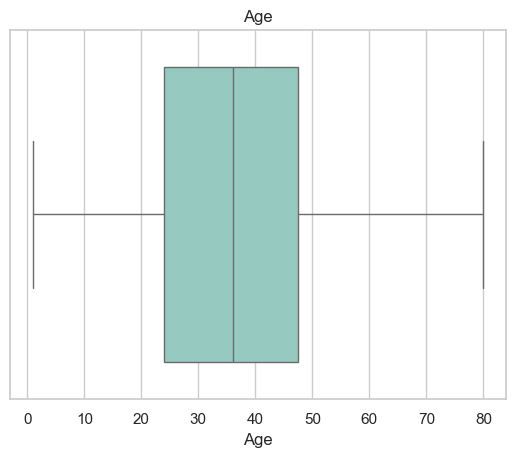

In [229]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("Age")
plt.show()

Label Counts:
1    123
0     60
Name: Survived, dtype: int64


<AxesSubplot: xlabel='Survived', ylabel='count'>

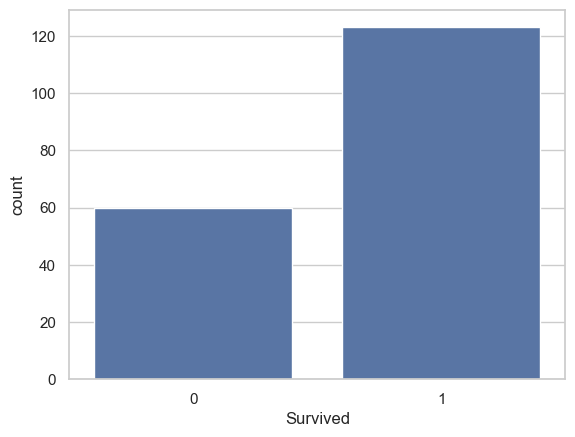

In [230]:
label_counts = df['Survived'].value_counts()
print("Label Counts:")
print(label_counts)

# Visualize label counts
sns.countplot(x='Survived', data=df)

In [231]:
# 'Sex'와 'Embarked' 열에 대해 이진화 (원-핫 인코딩)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# 수정된 DataFrame 확인
print(df.head())


    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name   Age  SibSp  Parch  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
6                             McCarthy, Mr. Timothy J  54.0      0      0   
10                    Sandstrom, Miss. Marguerite Rut   4.0      1      1   
11                           Bonnell, Miss. Elizabeth  58.0      0      0   

      Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
1   PC 17599  71.2833   C85           1         0           1           0   
3     113803  53.1000  C123           1         0           0           0   
6      17463  51.8625   E46           0         1           0           0   
10   P

In [232]:
# 'Survived'가 1이고 나이가 70 이상인 사람 제거
df = df.drop(df[(df['Survived'] == 0) & (df['Age'] <= 10)].index)

# 삭제된 정보가 있는지 확인
print(df[(df['Survived'] == 0) & (df['Age'] <= 10)])


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Age, SibSp, Parch, Ticket, Fare, Cabin, Sex_female, Sex_male, Embarked_C, Embarked_Q, Embarked_S]
Index: []


In [233]:
# 'Survived'가 1이고 나이가 70 이상인 사람 제거
df = df.drop(df[(df['Survived'] == 1) & (df['Age'] >= 70)].index)

# 삭제된 정보가 있는지 확인
print(df[(df['Survived'] == 1) & (df['Age'] >= 70)])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Age, SibSp, Parch, Ticket, Fare, Cabin, Sex_female, Sex_male, Embarked_C, Embarked_Q, Embarked_S]
Index: []


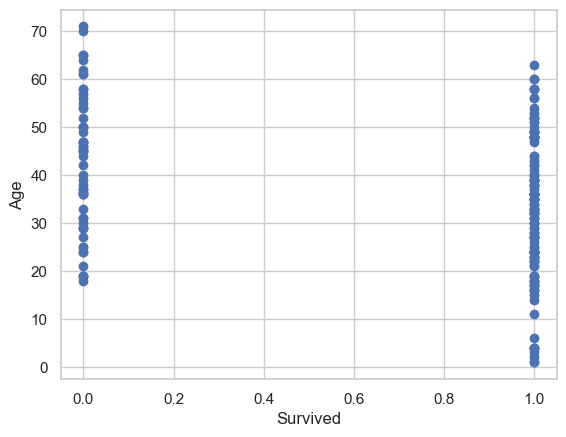

In [234]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Survived'], df['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')

plt.show()

In [235]:
# 'Name' 열 삭제
df = df.drop(columns=['Name'])

# 수정된 DataFrame 확인
print(df.head())


    PassengerId  Survived  Pclass   Age  SibSp  Parch    Ticket     Fare  \
1             2         1       1  38.0      1      0  PC 17599  71.2833   
3             4         1       1  35.0      1      0    113803  53.1000   
6             7         0       1  54.0      0      0     17463  51.8625   
10           11         1       3   4.0      1      1   PP 9549  16.7000   
11           12         1       1  58.0      0      0    113783  26.5500   

   Cabin  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
1    C85           1         0           1           0           0  
3   C123           1         0           0           0           1  
6    E46           0         1           0           0           1  
10    G6           1         0           0           0           1  
11  C103           1         0           0           0           1  


In [236]:
# 'Name' 열 삭제
df = df.drop(columns=['Ticket'])

# 수정된 DataFrame 확인
print(df.head())

    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare Cabin  \
1             2         1       1  38.0      1      0  71.2833   C85   
3             4         1       1  35.0      1      0  53.1000  C123   
6             7         0       1  54.0      0      0  51.8625   E46   
10           11         1       3   4.0      1      1  16.7000    G6   
11           12         1       1  58.0      0      0  26.5500  C103   

    Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
1            1         0           1           0           0  
3            1         0           0           0           1  
6            0         1           0           0           1  
10           1         0           0           0           1  
11           1         0           0           0           1  


In [237]:
# 'Name' 열 삭제
df = df.drop(columns=['Cabin'])

# 수정된 DataFrame 확인
print(df.head())

    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
1             2         1       1  38.0      1      0  71.2833           1   
3             4         1       1  35.0      1      0  53.1000           1   
6             7         0       1  54.0      0      0  51.8625           0   
10           11         1       3   4.0      1      1  16.7000           1   
11           12         1       1  58.0      0      0  26.5500           1   

    Sex_male  Embarked_C  Embarked_Q  Embarked_S  
1          0           1           0           0  
3          0           0           0           1  
6          1           0           0           1  
10         0           0           0           1  
11         0           0           0           1  


In [238]:
X=df.drop('Survived',axis=1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
6,7,1,54.0,0,0,51.8625,0,1,0,0,1
10,11,3,4.0,1,1,16.7000,1,0,0,0,1
11,12,1,58.0,0,0,26.5500,1,0,0,0,1


In [239]:
y=df['Survived']
y.value_counts()

1    122
0     58
Name: Survived, dtype: int64

In [240]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scaling (Standardization)
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

# Scaling (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)


In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [243]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_standardized, y_train)

pred_svm = clf_svm.predict(X_test_standardized)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7555555555555555
[[ 7  8]
 [ 3 27]]


In [244]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_standardized, y_train)

pred_lr = clf_lr.predict(X_test_standardized)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7777777777777778
[[ 9  6]
 [ 4 26]]


In [245]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train_standardized, y_train)

pred_nn = clf_nn.predict(X_test_standardized)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.8444444444444444
[[10  5]
 [ 2 28]]


In [246]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_standardized, y_train)

pred_dt = clf_dt.predict(X_test_standardized)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8
[[12  3]
 [ 6 24]]


In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_standardized, y_train)
pred = rf_clf.predict(X_test_standardized)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8222222222222222
[[ 9  6]
 [ 2 28]]


In [248]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_minmax, y_train)

pred_svm = clf_svm.predict(X_test_minmax)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7555555555555555
[[ 8  7]
 [ 4 26]]


In [249]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_minmax, y_train)

pred_lr = clf_lr.predict(X_test_minmax)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7555555555555555
[[ 8  7]
 [ 4 26]]


In [250]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train_minmax, y_train)

pred_nn = clf_nn.predict(X_test_minmax)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.8
[[10  5]
 [ 4 26]]


In [251]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_minmax, y_train)

pred_dt = clf_dt.predict(X_test_minmax)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8
[[12  3]
 [ 6 24]]


In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_minmax, y_train)
pred = rf_clf.predict(X_test_minmax)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8222222222222222
[[ 9  6]
 [ 2 28]]
